# Importing the Libraries

In [486]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
import plotly.graph_objects as go
import plotly as plotly
plotly.offline.init_notebook_mode()

# Framing the problem

The task here is to explore Multivariate Regression using Polynomial, Decision Trees and kNN, to optimize a model for predicting diabetes disease progression. 

# Getting the data

In [487]:
from sklearn import datasets

# X contains all the features and y contains the target variable
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)


# Exploratory Data Analysis

## Exploring and Describing the data

Here we can see the general description of our data.

In [488]:
print(datasets.load_diabetes().DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Let us check out our features.

In [489]:
X.head()

age       sex       bmi        bp        s1        s2        s3   
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401  \
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641

and a glance at our target

In [490]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

You can immediately observe that the `age`, `sex` and `bmi` columns have funny looking values. 

This is because in the description we were told that 

> Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1). 

So, this is why we cannot see the actual values for each column, but the good thing here is that the scaling of these values do not actually affect our prediction.



Let us perfrom some statistical calculation on our features.

In [491]:
X.describe()

age           sex           bmi            bp            s1   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17  
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260971e-01 -1.377672e-01  
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324559e-02 -3.317903e-02  
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947171e-03 -1.077698e-03  
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243232e-02  2.791705e-02  
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335973e-01  1.356118e-01

In [492]:
y.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

## Visualizing the Data

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'bp'}>, <Axes: title={'center': 's1'}>,
        <Axes: title={'center': 's2'}>],
       [<Axes: title={'center': 's3'}>, <Axes: title={'center': 's4'}>,
        <Axes: title={'center': 's5'}>],
       [<Axes: title={'center': 's6'}>, <Axes: >, <Axes: >]], dtype=object)

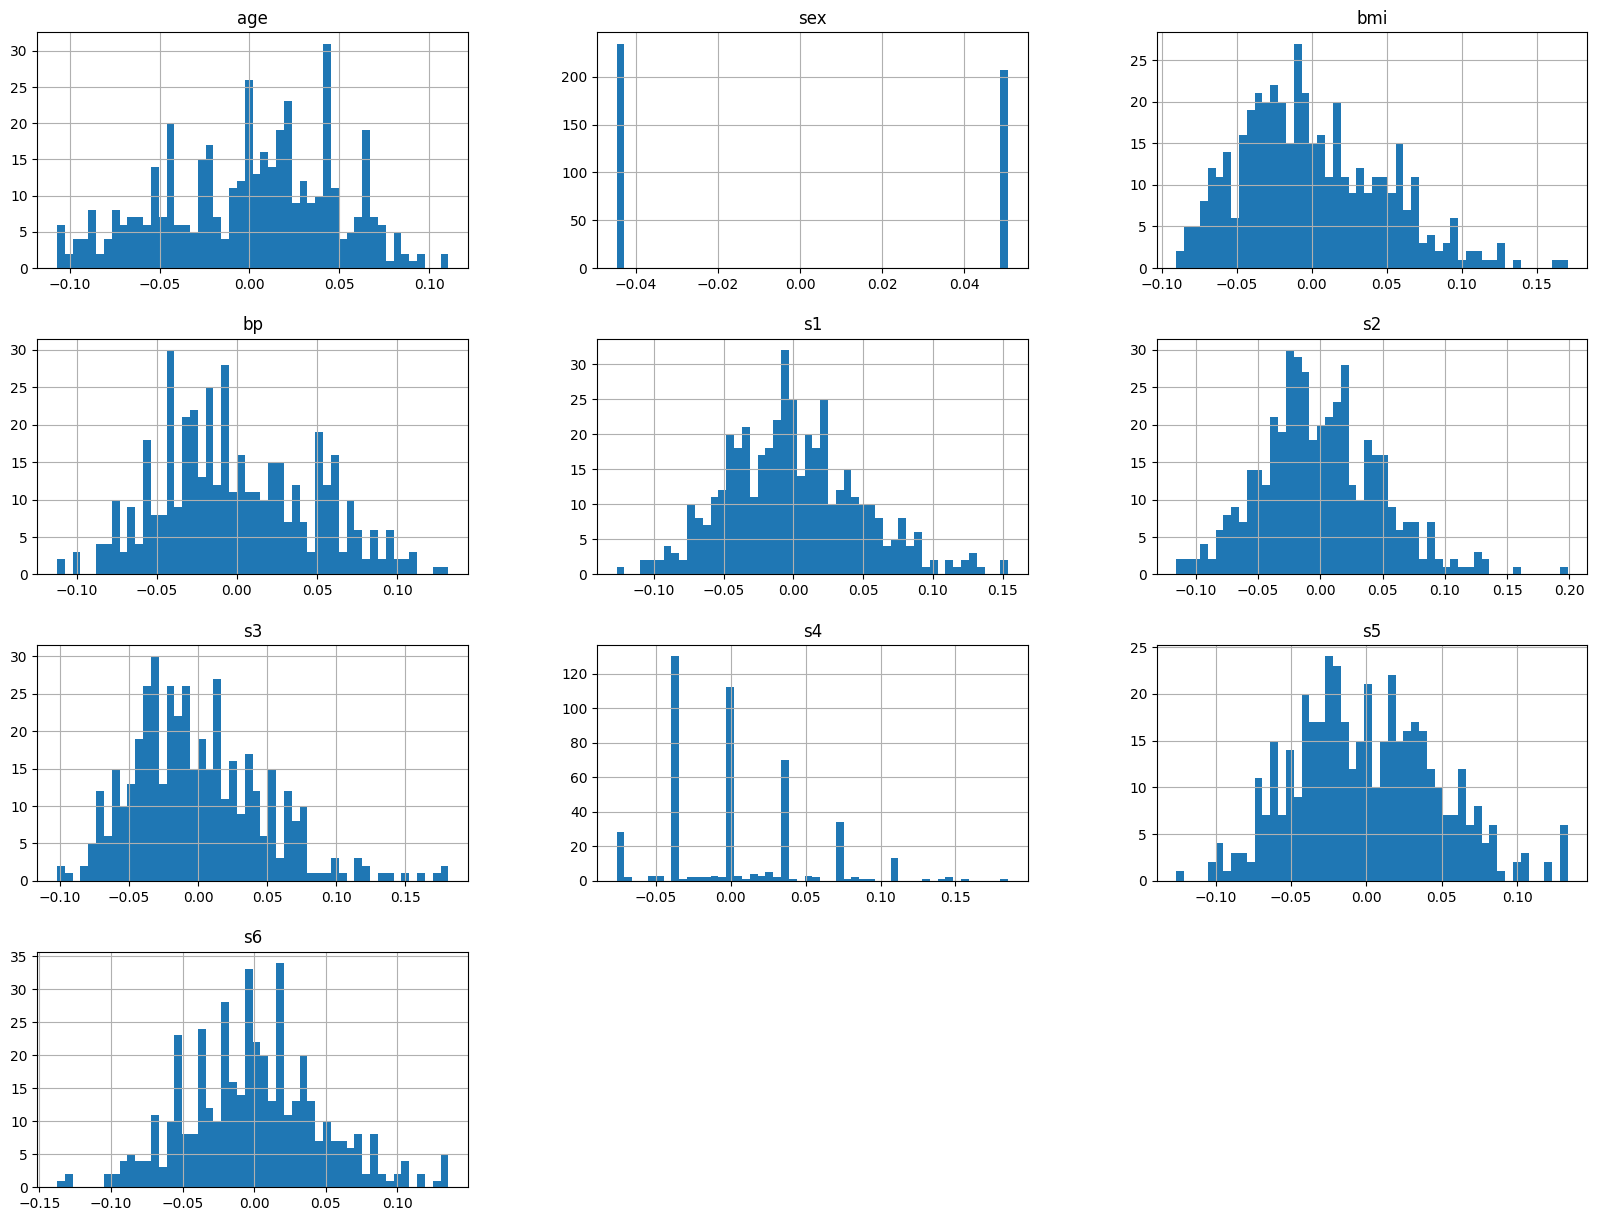

In [493]:
X.hist(bins=50,  figsize=(20, 15))

Text(0.5, 1.0, 'Disease Progression')

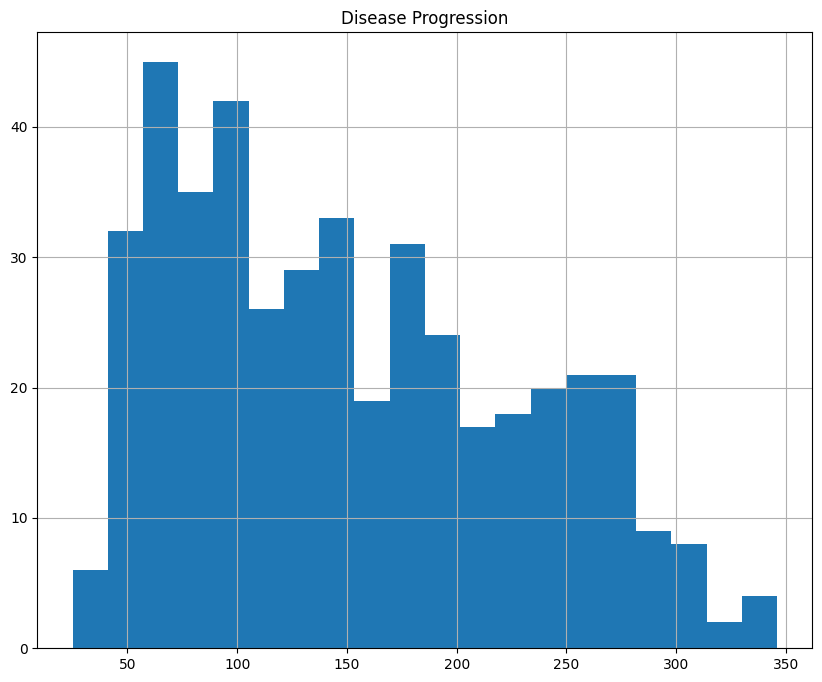

In [494]:
y.hist(bins=20, figsize=(10, 8))
plt.title('Disease Progression')

Let us do a small sneak peek into the relationship between some of our features and the target value.

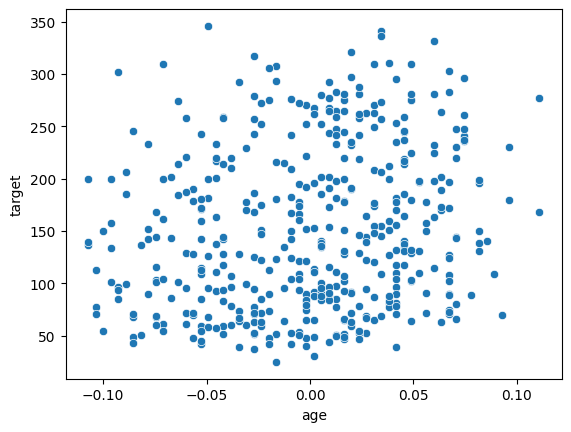

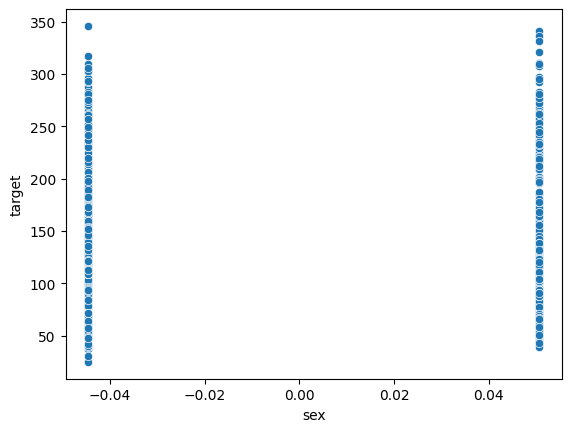

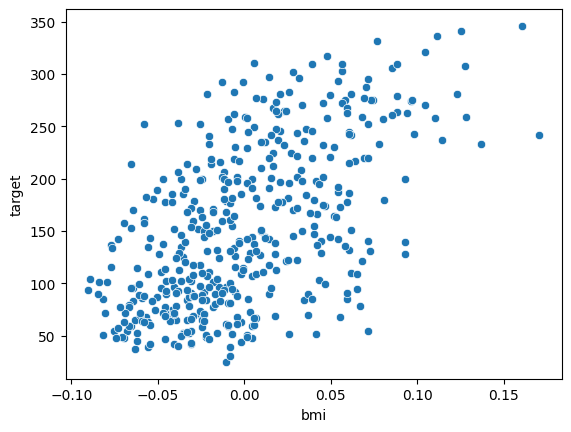

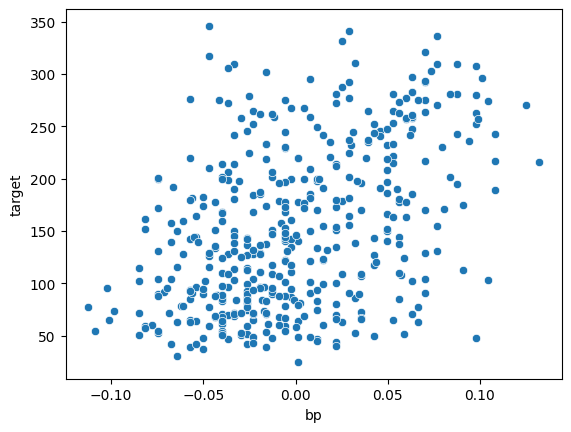

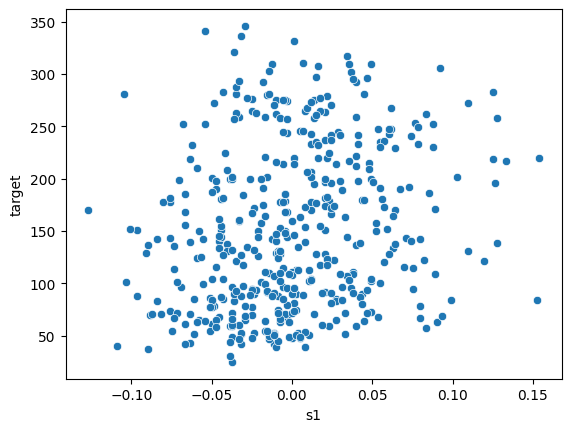

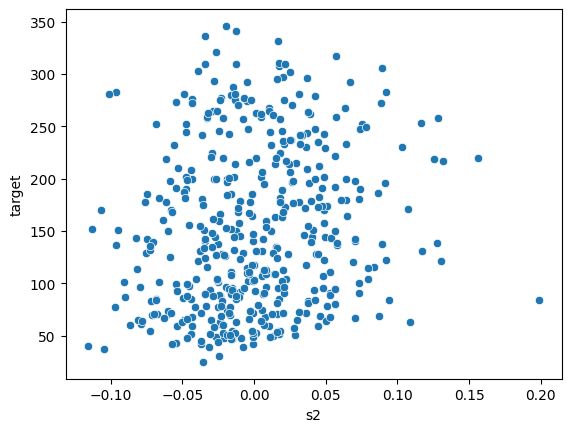

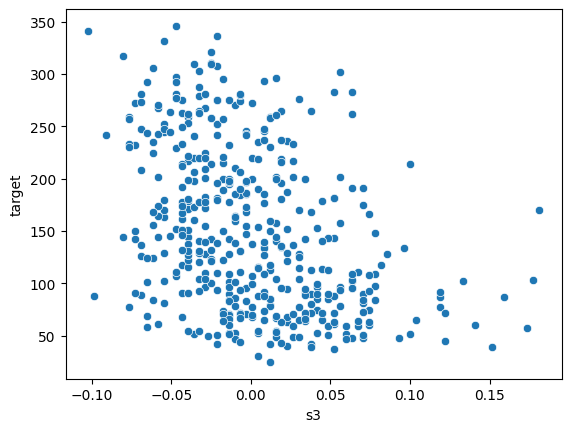

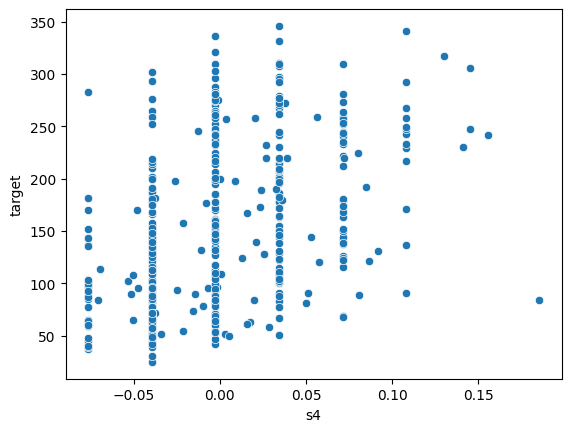

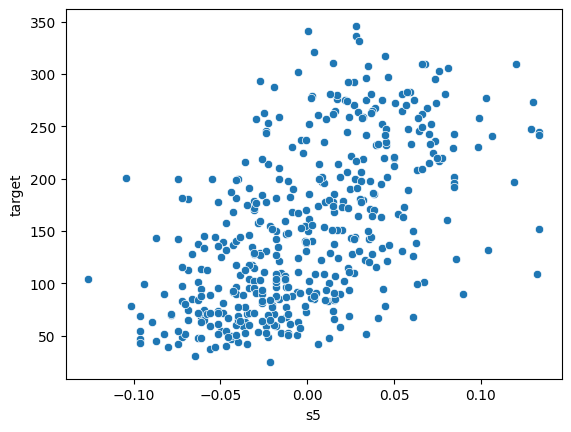

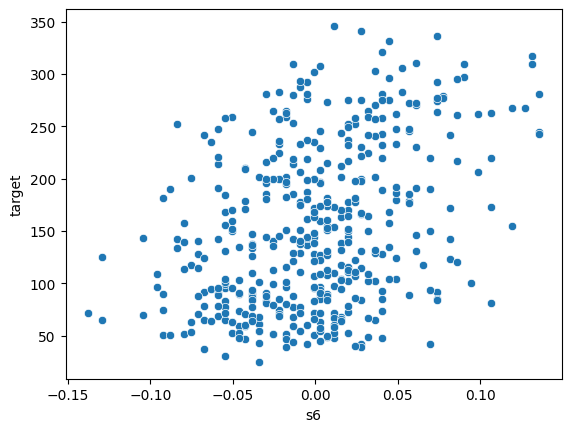

In [495]:
# use seaborn to plot a scatterplot of each of the features against the target variable
for i in range(X.shape[1]):
    sns.scatterplot(x=X.iloc[:, i], y=y)
    plt.show()

With an eye test, I would say that the features that show some significance positive correlation with our target variable are `bmi`, `s1` and `s5`. I would say maybe even `s5` the most.

Since we are doing a multivariate regression in this study we could use all of  `bmi`, `s1`, and `s5` features to predict the disease progression but so that we don't have any difficulties plotting our graphs, because then we would have 4 dimensions, so we will stick to just 2 features.

We will use `bmi` and `s5`

We will go ahead to drop all the other columns now.

In [496]:
# drop the other columns and keep only bmi, s1 and s5
X = X[['bmi', 's5']]
X.head()


bmi        s5
0  0.061696  0.019907
1 -0.051474 -0.068332
2  0.044451  0.002861
3 -0.011595  0.022688
4 -0.036385 -0.031988

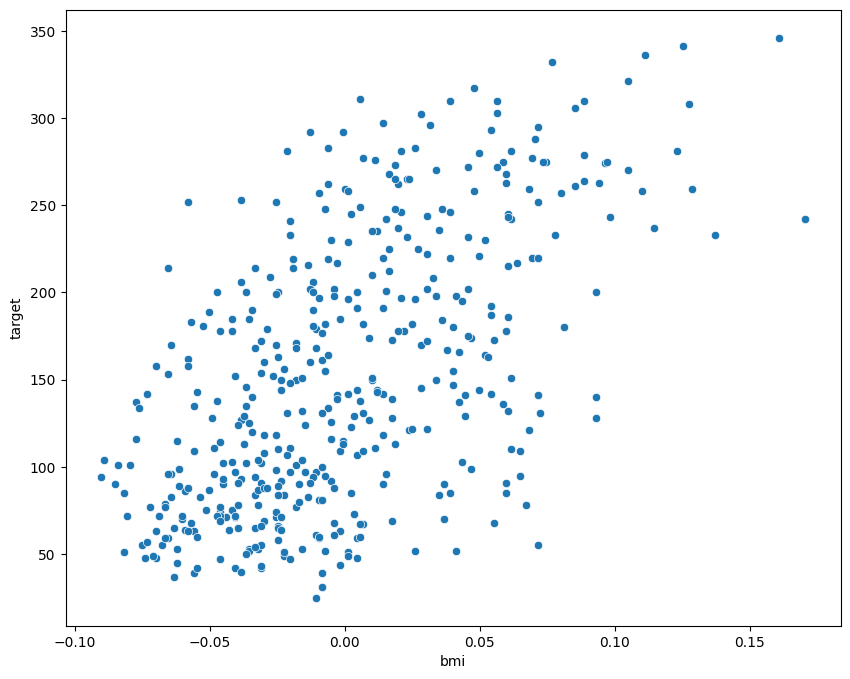

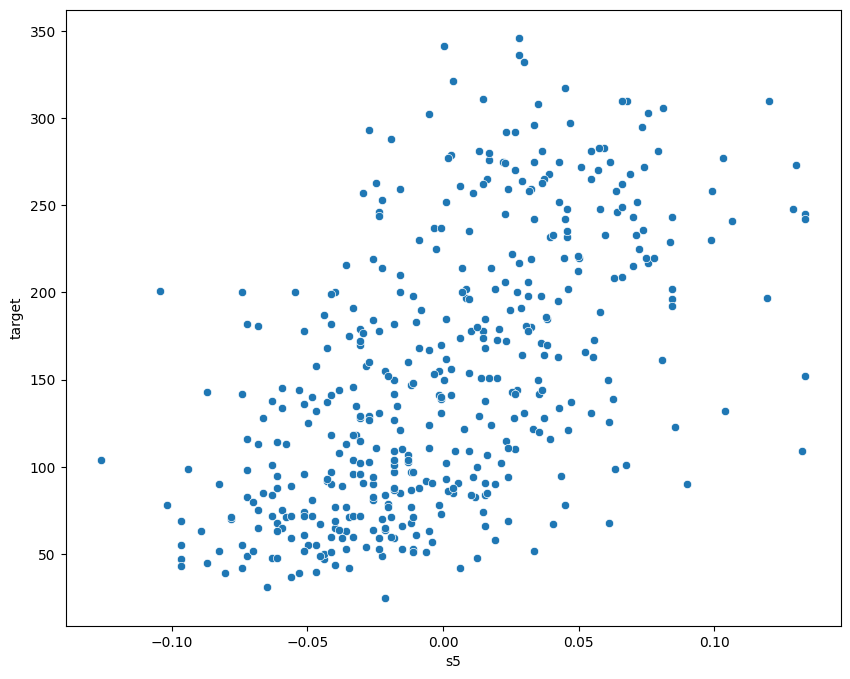

In [497]:
# plot the scatterplot of each of the features against the target variable
for i in range(X.shape[1]):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X.iloc[:, i], y=y)
    plt.show()

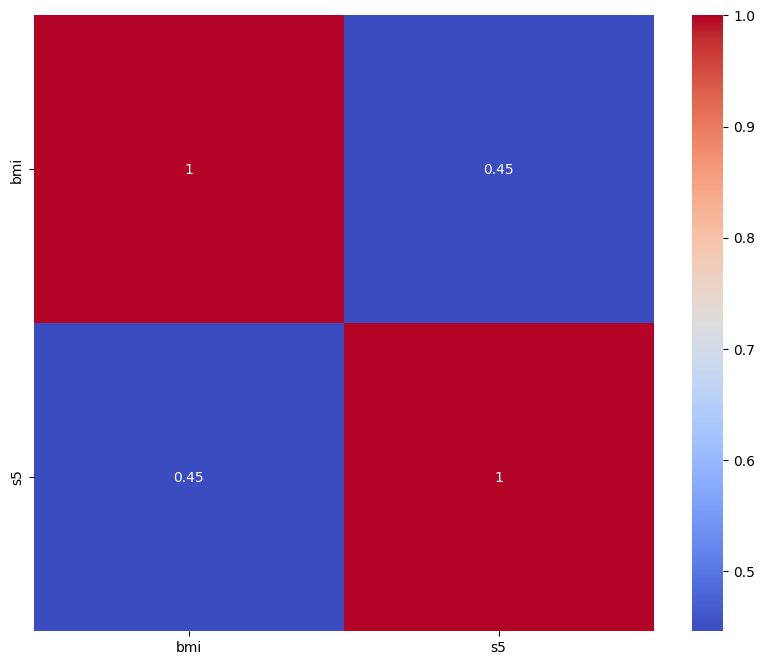

In [498]:
# use a heatmap to plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()


# Data Preprocessing

To clean up our data, we check if we have any rows with a missing or null value or any outliers that could skew our data.

In [499]:
X.isnull().sum()

bmi    0
s5     0
dtype: int64

In [500]:
y.isnull().sum()

0

All our rows are intact in the features, notably the `bmi` column and in our target variable and also no obvious outliers as well so we are good to go.

# Splitting the Data

We will be setting 15% of our data aside for our test set.

In [501]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Cross Validation

We will be using the cross validation function to cross validate our training data and score each split using `r sqaured`, `mape`, `mae`.

We will use a total of 9 models in total, as shown below.

In [502]:
# Define the models
models = {
    "Polynomial degree 1": make_pipeline(PolynomialFeatures(1), LinearRegression()),
    "Polynomial degree 2": make_pipeline(PolynomialFeatures(2), LinearRegression()),
    "Polynomial degree 3": make_pipeline(PolynomialFeatures(3), LinearRegression()),
    "Polynomial degree 4": make_pipeline(PolynomialFeatures(4), LinearRegression()),
    "Polynomial degree 5": make_pipeline(PolynomialFeatures(5), LinearRegression()),
    "Decision Tree depth 2": DecisionTreeRegressor(max_depth=2),
    "Decision Tree depth 3": DecisionTreeRegressor(max_depth=3),
    "kNN n=3": KNeighborsRegressor(n_neighbors=3),
    "kNN n=5": KNeighborsRegressor(n_neighbors=5)
}

Here, we define our cv parameter, telling it we want 5 splits and we also gave it a random state so this split can be reproducible.

In [503]:
# Define the cross-validation
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# Define the results table
results = []

In [504]:

# Perform cross-validation on each model
for name, model in models.items():
    scores = cross_validate(model, X_train, y_train, cv=cv, scoring=('r2', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'))
    r2_score_mean = scores['test_r2'].mean()
    r2_score_std = scores['test_r2'].std()
    mae_mean = scores['test_neg_mean_absolute_error'].mean()
    mae_std = scores['test_neg_mean_absolute_error'].std()
    mape_mean = scores['test_neg_mean_absolute_percentage_error'].mean()
    mape_std = scores['test_neg_mean_absolute_percentage_error'].std()
    results.append([name, r2_score_mean, r2_score_std, mae_mean, mae_std, mape_mean, mape_std])


**Note that the neg_mean_squared_error scoring function actually returns the negative of the mean squared error, since cross_val_score is designed so that higher scores are better. Thus, if you use this scoring metric, you should keep in mind that a score of 0 is the best possible score, and values less than 0 indicate errors.**

In [505]:

# Convert the results to a DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'R2 Mean', 'R2 Std', 'MAE Mean', 'MAE Std', 'MAPE Mean', 'MAPE Std'])


In [506]:
results_df

Model   R2 Mean    R2 Std   MAE Mean   MAE Std  MAPE Mean   
0    Polynomial degree 1  0.440281  0.042441 -47.767197  4.231336  -0.426226  \
1    Polynomial degree 2  0.430907  0.032535 -47.672097  4.035593  -0.422812   
2    Polynomial degree 3  0.437565  0.022661 -47.230136  3.292070  -0.416748   
3    Polynomial degree 4  0.375715  0.095833 -49.017636  5.640550  -0.426840   
4    Polynomial degree 5  0.332743  0.175848 -50.231737  6.136777  -0.434455   
5  Decision Tree depth 2  0.356494  0.024002 -50.044019  3.287517  -0.438671   
6  Decision Tree depth 3  0.380238  0.028400 -48.902250  4.070571  -0.418959   
7                kNN n=3  0.255947  0.076486 -53.259556  5.009194  -0.453704   
8                kNN n=5  0.351291  0.033055 -50.172800  4.271252  -0.427774   

   MAPE Std  
0  0.062421  
1  0.061110  
2  0.060742  
3  0.066383  
4  0.066615  
5  0.060399  
6  0.067107  
7  0.066325  
8  0.066198


|   | Model                 | R2 Mean   | R2 SD    | MAE Mean    | MAE SD   | MAPE Mean  | MAPE SD  |
|---|-----------------------|-----------|-----------|-------------|-----------|------------|-----------|
| 1 | Polynomial degree 1   | 0.440281  | 0.042441  | -47.767197  | 4.231336  | -0.426226  | 0.062421  |
| 2 | Polynomial degree 2   | 0.430907  | 0.032535  | -47.672097  | 4.035593  | -0.422812  | 0.061110  |
| 3 | Polynomial degree 3   | 0.437565  | 0.022661  | -47.230136  | 3.292070  | -0.416748  | 0.060742  |
| 4 | Polynomial degree 4   | 0.375715  | 0.095833  | -49.017636  | 5.640550  | -0.426840  | 0.066383  |
| 5 | Polynomial degree 5   | 0.332743  | 0.175848  | -50.231737  | 6.136777  | -0.434455  | 0.066615  |
| 6 | Decision Tree depth 2 | 0.356494  | 0.024002  | -50.044019  | 3.287517  | -0.438671  | 0.060399  |
| 7 | Decision Tree depth 3 | 0.380238  | 0.028400  | -48.902250  | 4.070571  | -0.418959  | 0.067107  |
| 8 | kNN n=3               | 0.255947  | 0.076486  | -53.259556  | 5.009194  | -0.453704  | 0.066325  |
| 9 | kNN n=5               | 0.351291  | 0.033055  | -50.172800  | 4.271252  | -0.427774  | 0.066198  |


# Model Evaluation

## Evaluating the best model

From the table above, we have seen how each model scores against the evaluation metrics. The polynomial of degree 1 seems to have the best metrics based on the R sqaure, MAE and MAPE values.

Below we will choose our best model by taking the average of these three mentioned scores across all the models and rank them.

In [507]:
# Identify the model with the best R2 Mean
best_r2_model = results_df.loc[results_df['R2 Mean'].idxmax()]['Model']

# Identify the model with the best MAE Mean (lowest in this case because it's an error metric)
best_mae_model = results_df.loc[results_df['MAE Mean'].idxmax()]['Model']

# Identify the model with the best MAPE Mean (lowest in this case because it's an error metric)
best_mape_model = results_df.loc[results_df['MAPE Mean'].idxmax()]['Model']

print(f"The model with the best R2 Mean is: {best_r2_model}")
print(f"The model with the best MAE Mean is: {best_mae_model}")
print(f"The model with the best MAPE Mean is: {best_mape_model}")

# best_model_name = results_df.loc[results_df['Mean Score'].idxmax()]['Model']
# print(f"The best model is: {best_model_name}")


# best_model = models[best_model_name]
# best_model

The model with the best R2 Mean is: Polynomial degree 1
The model with the best MAE Mean is: Polynomial degree 3
The model with the best MAPE Mean is: Polynomial degree 3


As we can see fro the above, the polynomial of degree 1 has the best mean score while the polynomial of degree 3 has both the best MAE score and the MAPE score.

You can also notice that the difference between the r2 score of polynomial degree 1 and degree 3 are not too far off from each other.

On this note, we will be choosing the polynomial with degree 3 as our best model.

In [508]:
best_model = models['Polynomial degree 3']
best_model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [509]:

# Fit the model and get the coefficients
pp = make_pipeline(PolynomialFeatures(3), LinearRegression()).fit(X_train, y_train).named_steps['linearregression']

# Round the coefficientso a numpy array and round to 3 decimal places
# rounded_coefficients = np.round(np.array(coefficients), 3)


print(pp.coef_)
print(pp.intercept_)

[ 0.00000000e+00  5.93782047e+02  8.97890626e+02  1.07927864e+03
  1.57599946e+03  2.08208561e+01  2.26956324e+04 -6.89968829e+04
  2.98562860e+03 -2.41040610e+04]
148.2186446862818


Equation is `y = 148.2186446862818 + 593.782047*bmi + 897.890626*s5 + 1079.27864*bmi^2 + 1575.99946*s5^2 + 20.8208561*bmi*s5 - 26956.324*bmi^3 + 68996.8829*s5^3 - 2985.62860*bmi^2*s5 + 24104.0610*bmi*s5^2`

## Chosen Model on the test set

In [510]:
# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

In [511]:
# Print the results
print(f"R2 score on test data: {r2}")
print(f"MAE on test data: {mae}")
print(f"MAPE on test data: {mape}")

R2 score on test data: 0.43616832177035714
MAE on test data: 43.99618383925305
MAPE on test data: 0.39526468586623525



| Metric | Value |
| --- | --- |
| Model | Polynomial degree 3 |
| R2 Score on Test Data | 0.43616832177035714 |
| MAE on Test Data | 43.99618383925305 |
| MAPE on Test Data | 0.39526468586623525 |

This table summarizes the performance of the "Polynomial degree 3" model on the test data.

## Graphing the data and model

### Train+Validation Data

In [512]:
## Prepare the data for Visualization
x_surf, y_surf = np.meshgrid(np.linspace(X_train['bmi'].min(), X_train['bmi'].max(), 100), np.linspace(X_train['s5'].min(), X_train['s5'].max(), 100))
onlyX = pd.DataFrame({'bmi': x_surf.ravel(), 's5': y_surf.ravel()})
fittedY=best_model.predict(onlyX)

fittedY=np.array(fittedY)

**Matplotlib**

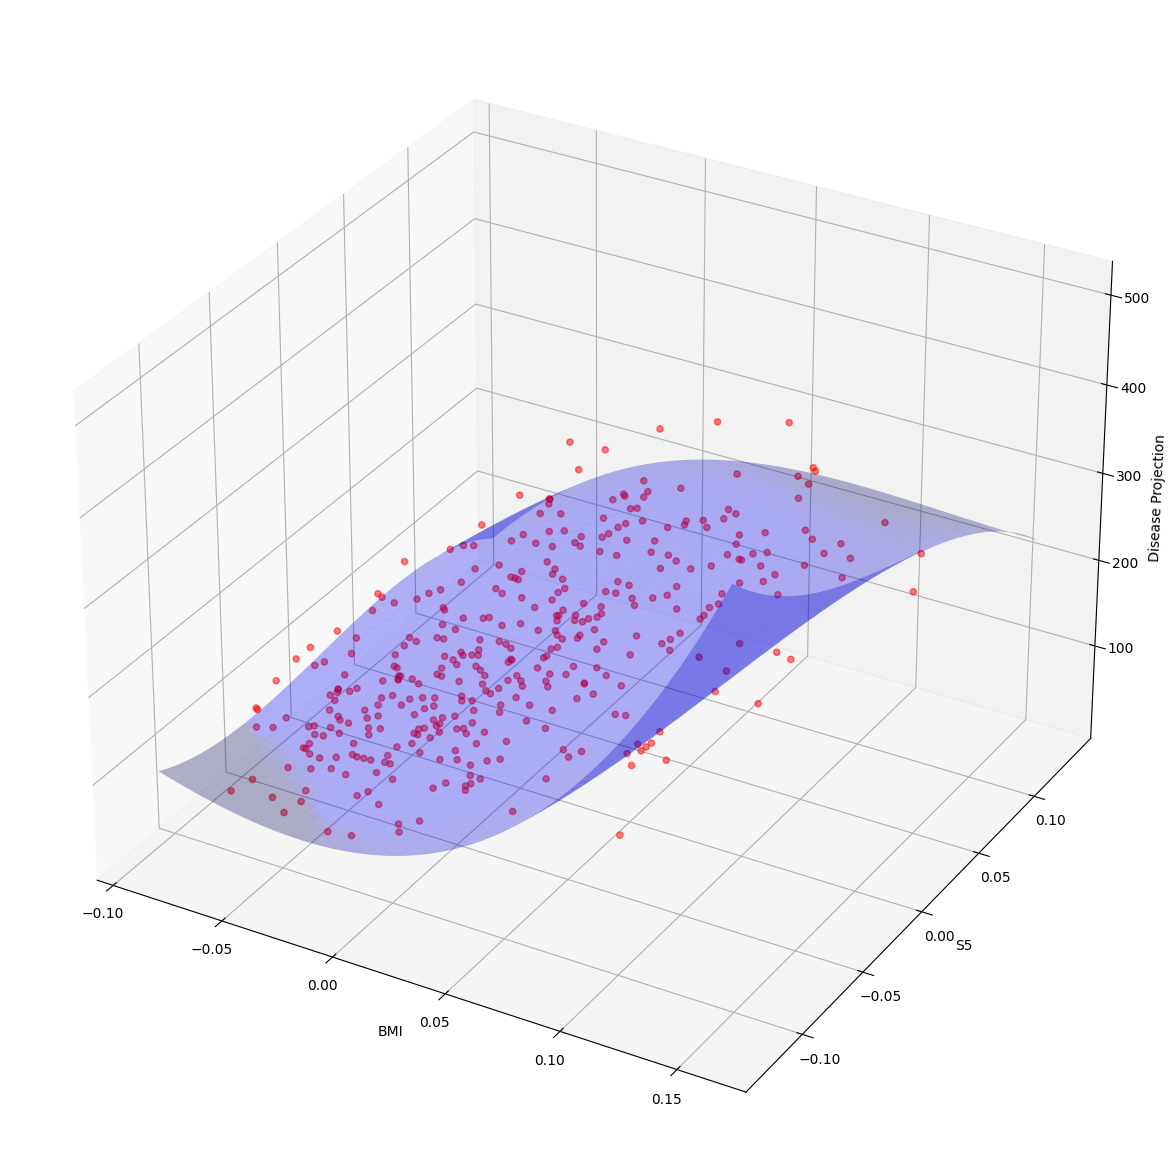

In [513]:
fig = plt.figure(figsize=(20,15))
### Set figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['bmi'],X_train['s5'],y_train,c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('BMI')
ax.set_ylabel('S5')
ax.set_zlabel('Disease Projection')
plt.show()


**Plotly**

In [514]:
# Create a 3D scatter plot
scatter = go.Scatter3d(x=X_train['bmi'], y=X_train['s5'], z=y_train,
                       mode='markers',
                       marker=dict(size=4, color='red', opacity=0.5))

# Create a surface plot
surface = go.Surface(x=x_surf, y=y_surf, z=fittedY.reshape(x_surf.shape), colorscale='Blues', opacity=0.7)

# Create the figure
fig = go.Figure(data=[scatter, surface])

# Set labels
fig.update_layout(scene = dict(
                    xaxis_title='BMI',
                    yaxis_title='S5',
                    zaxis_title='Disease Projection'),
                  width=1200, height=800)

# Show the plot
fig.show()

### Test Data

In [515]:
## Prepare the data for Visualization
x_surf, y_surf = np.meshgrid(np.linspace(X_test['bmi'].min(), X_test['bmi'].max(), 100), np.linspace(X_test['s5'].min(), X_test['s5'].max(), 100))
onlyX = pd.DataFrame({'bmi': x_surf.ravel(), 's5': y_surf.ravel()})
fittedY=best_model.predict(onlyX)

fittedY=np.array(fittedY)

**Matplotlib**

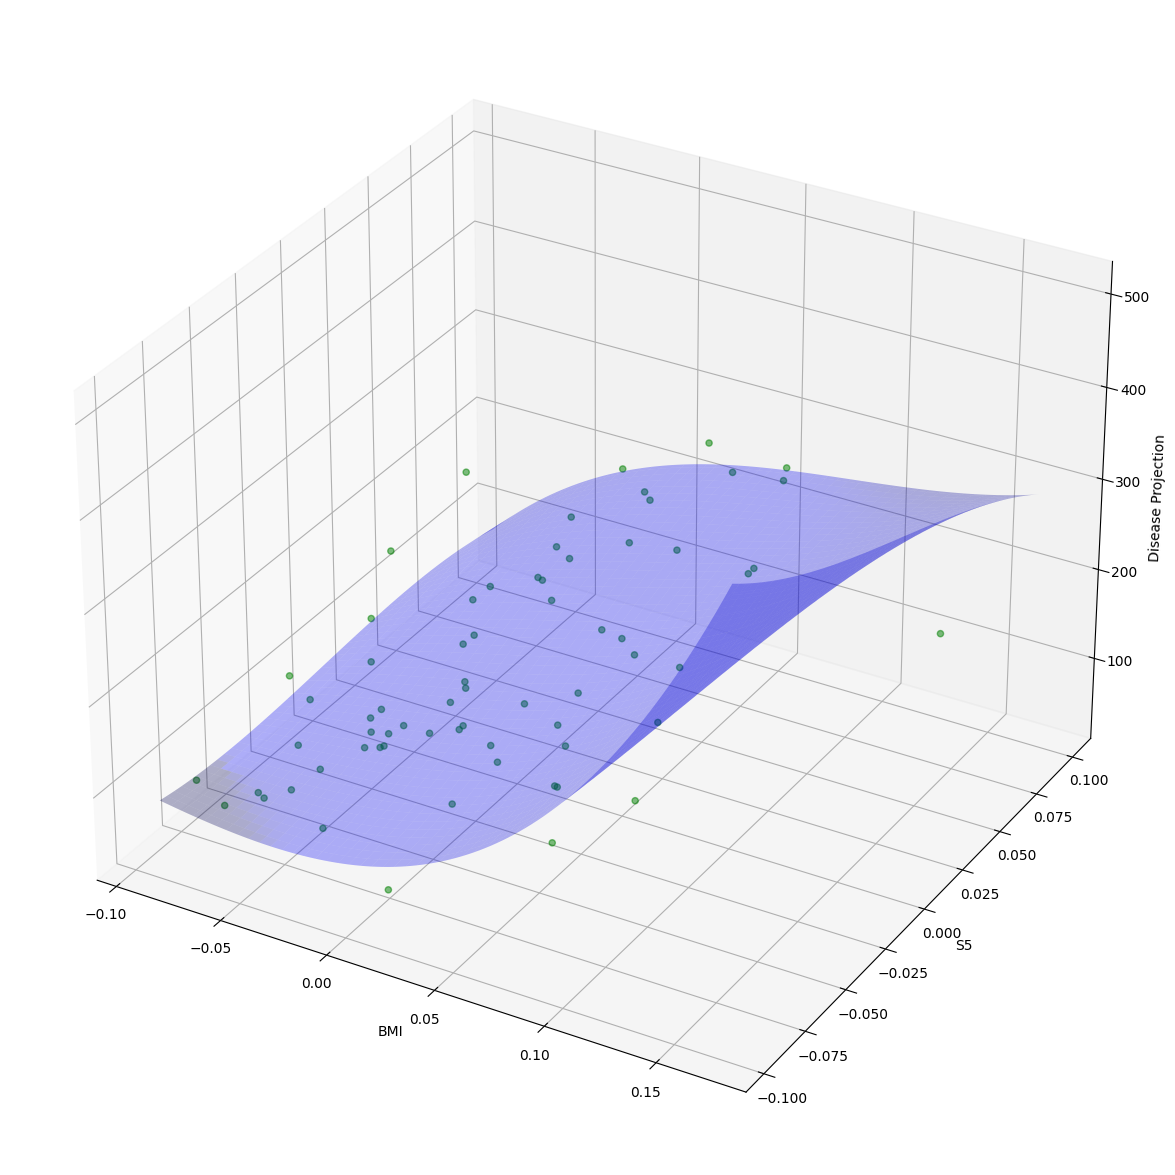

In [516]:
fig = plt.figure(figsize=(20,15))
### Set figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['bmi'],X_test['s5'],y_test,c='green', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('BMI')
ax.set_ylabel('S5')
ax.set_zlabel('Disease Projection')
plt.show()


**Plotly**

In [518]:
# Create a 3D scatter plot
scatter = go.Scatter3d(x=X_test['bmi'], y=X_test['s5'], z=y_test,
                       mode='markers',
                       marker=dict(size=4, color='green', opacity=0.5))

# Create a surface plot
surface = go.Surface(x=x_surf, y=y_surf, z=fittedY.reshape(x_surf.shape), colorscale='Blues', opacity=0.7)

# Create the figure
fig = go.Figure(data=[scatter, surface])

# Set labels
fig.update_layout(scene = dict(
                    xaxis_title='BMI',
                    yaxis_title='S5',
                    zaxis_title='Disease Projection'),
                  width=1200, height=800)

# Show the plot
fig.show()

# Conclusion

We have been able to with the polynomial of degree 3 and the bmi and s5 features, to predict the disease projection and it has done quite a good job.

The body mass index, coupled with the log of serum triglycerides level gives a fair prediction on the disease projection.

Though this model was chosen as the best model, there are some things worth pointing out. First of all, it didn't have the best r2 score of all our models. The MAE and MAPE are also relatively high even though they were the highest among our models.


Since it is a polynomial, the problem of overfitting can happen. 


Being a multivariate regression, graphing our data is sometimes tricky and even when we are able to graph it, the issue of interpretation is there also.